In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import nltk

from collections import Counter
from typing import List

import seaborn
seaborn.set(palette='summer')

/Users/anatolii/Desktop/movies_subtitles/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/anatolii/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

## Подготовка данных

In [4]:
df = pd.read_csv('medium_articles.csv')
df.fillna("None", inplace=True)
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
test

,title,text,url,authors,timestamp,tags
51649,2018: Is the Crypto HYPE real?,→ Flagman\n\nIt seems logical to start the inv...,https://medium.com/cc-connecting-crypto-with-b...,[],2018-01-25 10:55:14.696000+00:00,"['Bitcoin', 'Adoption', 'Humor', 'Cryptocurren..."
68568,Liberal Arts Blog — the Brain — What is the Mo...,Liberal Arts Blog — Wednesday is the Joy of Sc...,https://medium.com/@john-muresianu/liberal-art...,['John Muresianu'],2020-12-09 13:57:22.716000+00:00,"['Phisiology', 'Education', 'Liberal Arts Blog..."
176024,Month one is a wrap!! #WenHop,We want to give a huge shout out to our early ...,https://medium.com/@marseconomy/month-one-is-a...,['Mars Economy'],2021-06-17 20:05:16.168000+00:00,"['Entrepreneurship', 'Mars', 'Cryptocurrency',..."
59788,10 Principles For Schools of Modern Learning,It’s time to raise the bar on our conversation...,https://medium.com/modern-learning/10-principl...,['Will Richardson'],2017-01-31 15:51:54.291000+00:00,"['Education', 'Tech', 'Learning', 'Change']"
58637,Narcissistic Sociopathy of Wealth,Seeking Arrangement and tech bro CEO’s fashion...,https://ljgolden55.medium.com/narcissistic-soc...,['Lester Golden'],2020-12-29 11:35:54.699000+00:00,"['Wealth', 'Capitalism', 'Sex', 'Love', 'Relat..."
...,...,...,...,...,...,...
71513,Create AWS Lambda Layers for Python packages,Check/Install Python\n\nYou can check to see i...,https://medium.com/@amirhos-imani/create-aws-l...,['Amirhs. Imani'],2020-12-23 06:07:53.208000+00:00,"['Lambda', 'Python', 'AWS', 'Cloud9', 'Pandas']"
29879,Takeaways from an election,Some quick takeaways from this past week’s ele...,https://hcobban.medium.com/takeaways-from-an-e...,['Helena Cobban'],2020-11-08 21:45:28.395000+00:00,"['Us Foreign Policy', 'Democratic Party', 'US ..."
63074,Using Plotly’s Dash to deliver public sector d...,Building and using decision support systems is...,https://medium.com/a-r-g-o/using-plotlys-dash-...,['Adriano Yoshino'],2018-05-21 20:04:10.114000+00:00,"['Plotly', 'Python', 'Dash', 'Data Visualizati..."
181226,Sideline Savaii (Finding your feet),"2020 was a year of true dismay. Ideally, it ha...",https://medium.com/@neuelimauafu98/sideline-sa...,['Neueli Mauafu'],2021-09-07 02:06:52.427000+00:00,"['Opportunities', 'Sports', 'Samoa']"


In [6]:
sentences = []

for sentence in tqdm(test['text']):
    sentences.extend([x.lower() for x in sent_tokenize(sentence) if len(x) < 128])

100%|██████████| 38474/38474 [00:13<00:00, 2881.58it/s]


In [7]:
sentences

['→ flagman\n\nit seems logical to start the investigation from the roots.',
 'the largest cryptocurrency bitcoin has just celebrated its 9th birthday and is not planning on going anywhere.',
 'currently being valued at around $12,000 usd, crypto ‘patient zero’ has enjoyed 1,470% rise in 2017.',
 'what doesn’t kill you, really makes you stronger and apparently, more expensive.',
 'patient zero has passed the hype check-up.',
 'it’s real.',
 'from what it’s worth the ico trend does not seem to slow down either and will likely continue in the upcoming future.',
 'crypto team roster is getting longer and stronger but only looks won’t suffice: they will have to prove themselves in court.',
 'ball is life and crypto team is currently on hype.',
 'waiting queues are getting longer than during the release of a new iphone.',
 'at least you don’t have to camp in a tent on a curb beside an apple store waiting to get on the next best thing.',
 'demand curve is not being met by supply in the marke

In [8]:
len(sentences)

1156038

# Посимвольная токенизация

In [9]:
chars = Counter()

for sentence in tqdm(sentences):
    for char in sentence:
        chars[char] += 1

100%|██████████| 1156038/1156038 [00:09<00:00, 121844.07it/s]


In [10]:
chars

Counter({' ': 13072830,
         'e': 7941706,
         't': 6079071,
         'o': 5170114,
         'a': 5166033,
         'i': 4800871,
         'n': 4434639,
         's': 4294253,
         'r': 3853952,
         'h': 2970698,
         'l': 2716530,
         'd': 2309526,
         'u': 2003524,
         'c': 1996019,
         'm': 1677034,
         'y': 1415268,
         'p': 1409518,
         'g': 1347491,
         'f': 1344574,
         'w': 1310798,
         '.': 1090287,
         'b': 993038,
         'v': 725286,
         ',': 607389,
         'k': 572057,
         '’': 256560,
         '\n': 197896,
         'x': 153391,
         'j': 115679,
         '-': 104320,
         '0': 95540,
         '?': 86525,
         '1': 75813,
         'q': 71377,
         '2': 67361,
         'z': 62605,
         ':': 57259,
         '“': 50272,
         ')': 46972,
         '”': 46107,
         '(': 43832,
         '!': 37780,
         '3': 31648,
         '5': 29844,
         '—': 29238,
  

In [11]:
len(chars)

3034

In [12]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
counter_threshold = 500

for char, cnt in chars.items():
    if cnt > counter_threshold:
        vocab.add(char)

In [13]:
vocab

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '<bos>',
 '<eos>',
 '<pad>',
 '<unk>',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '·',
 'é',
 'а',
 'е',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…'}

In [14]:
len(vocab)

83

In [15]:
char2ind = {char: i for i, char in enumerate(vocab)}
ind2char = {i: char for char, i in char2ind.items()}

In [16]:
class CharDataset:
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = char2ind['<unk>']
        self.bos_id = char2ind['<bos>']
        self.eos_id = char2ind['<eos>']
        self.pad_id = char2ind['<pad>']

    def __getitem__(self, idx: int) -> List[int]:
        tokenized_sentence = [self.bos_id]
        tokenized_sentence += [char2ind.get(char, self.unk_id) for char in self.data[idx]] 
        tokenized_sentence += [self.eos_id]

        return tokenized_sentence

    def __len__(self) -> int:
        return len(self.data)

In [17]:
def collate_fn_with_padding(
    input_batch: List[List[int]], pad_id=char2ind['<pad>']) -> torch.Tensor:
    seq_lens = [len(x) for x in input_batch]
    max_seq_len = max(seq_lens)

    new_batch = []
    for sequence in input_batch:
        for _ in range(max_seq_len - len(sequence)):
            sequence.append(pad_id)
        new_batch.append(sequence)
    
    sequences = torch.LongTensor(new_batch).to(device)

    new_batch = {
        'input_ids': sequences[:,:-1],
        'target_ids': sequences[:,1:]
    }

    return new_batch

dataset = CharDataset(sentences)
dataloader = DataLoader(dataset, collate_fn=collate_fn_with_padding, batch_size=256)

## Архитектура модели

In [18]:
class CharLM(nn.Module):
    def __init__(self, hidden_dim: int, vocab_size: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.rnn = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, vocab_size)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  
        output, _ = self.rnn(embeddings)  
        output = self.dropout(self.linear(self.non_lin(output)))  
        projection = self.projection(self.non_lin(output)) 

        return projection

In [19]:
model = CharLM(hidden_dim=256, vocab_size=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=char2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [20]:
num_epoch = 10
losses = []

for epoch in range(num_epoch):
    epoch_losses = []
    model.train()
    with tqdm(dataloader, desc=f'Training epoch {epoch+1}') as pbar:
        for batch in pbar:
            optimizer.zero_grad()
            logits = model(batch['input_ids']).flatten(start_dim=0, end_dim=1)
            loss = criterion(logits, batch['target_ids'].flatten())
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            pbar.set_postfix({'loss': loss.item()}) 
    
    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1} Average Loss: {epoch_loss}')

Training epoch 1: 100%|██████████| 4516/4516 [05:22<00:00, 13.98it/s, loss=1.46]


Epoch 1 Average Loss: 1.5173337320715479


Training epoch 2: 100%|██████████| 4516/4516 [05:16<00:00, 14.29it/s, loss=1.41]


Epoch 2 Average Loss: 1.3481461036458704


Training epoch 3: 100%|██████████| 4516/4516 [05:22<00:00, 14.01it/s, loss=1.39]


Epoch 3 Average Loss: 1.3143790790842527


Training epoch 4: 100%|██████████| 4516/4516 [05:24<00:00, 13.90it/s, loss=1.38]


Epoch 4 Average Loss: 1.2964243272746738


Training epoch 5: 100%|██████████| 4516/4516 [05:23<00:00, 13.96it/s, loss=1.37]


Epoch 5 Average Loss: 1.2849445996081754


Training epoch 6: 100%|██████████| 4516/4516 [05:24<00:00, 13.90it/s, loss=1.36]


Epoch 6 Average Loss: 1.2767234531200702


Training epoch 7: 100%|██████████| 4516/4516 [05:18<00:00, 14.19it/s, loss=1.35]


Epoch 7 Average Loss: 1.2704049917424645


Training epoch 8: 100%|██████████| 4516/4516 [05:13<00:00, 14.40it/s, loss=1.35]


Epoch 8 Average Loss: 1.2653761751309658


Training epoch 9: 100%|██████████| 4516/4516 [05:13<00:00, 14.40it/s, loss=1.34]


Epoch 9 Average Loss: 1.2612351586694102


Training epoch 10: 100%|██████████| 4516/4516 [05:16<00:00, 14.28it/s, loss=1.34]

Epoch 10 Average Loss: 1.2578088133814485


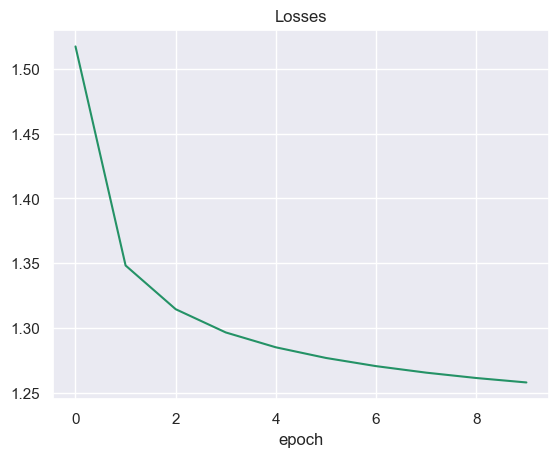

In [21]:
plt.plot(np.arange(len(losses)), losses)
plt.title('Losses')
plt.xlabel("epoch")
plt.show()

## Генерация текста

In [22]:
def greedy_generate(model, starting_seq: str, max_seq_len: int = 128) -> str:
    device = 'cpu'
    model = model.to(device)
    input_ids = [char2ind['<bos>']] + [char2ind.get(char, char2ind['<unk>']) for char in starting_seq]
    input_ids = torch.LongTensor(input_ids).to(device)
    
    model.eval()
    with torch.no_grad():
        for i in range(max_seq_len):
            next_char_distribution = model(input_ids)[-1]
            next_char = next_char_distribution.squeeze().argmax()
            input_ids = torch.cat([input_ids, next_char.unsqueeze(0)])

            if next_char.item() == char2ind['<eos>']:
                break
    
    words = ''.join([ind2char[idx.item()] for idx in input_ids])

    return words

test1 = greedy_generate(model, starting_seq='you know ')
test2 = greedy_generate(model, starting_seq='you can catch a ')
test3 = greedy_generate(model, starting_seq='tell me ')
test4 = greedy_generate(model, starting_seq='a long ')

print(test1)
print(test2)
print(test3)
print(test4)


<bos>you know what the start of the same way to see the same time.<eos>
<bos>you can catch a communication of the community to the same time.<eos>
<bos>tell me that i was a simple and the same time.<eos>
<bos>a long time with the same time to see the same time to see the same time.<eos>


# Пословная токенизация

In [65]:
word_counter = Counter()
for sentence in tqdm(sentences):
    words = word_tokenize(sentence)
    word_counter.update(words)

100%|██████████| 1156038/1156038 [00:33<00:00, 34306.40it/s]


In [66]:
word_counter

Counter({'.': 1033540,
         'the': 677437,
         ',': 601356,
         'to': 440927,
         'and': 346211,
         'a': 339249,
         'of': 302461,
         '’': 256560,
         'is': 226749,
         'in': 222343,
         'you': 208027,
         'i': 205165,
         'it': 193711,
         'that': 169730,
         'for': 146770,
         'this': 123198,
         'we': 114391,
         's': 110230,
         'are': 107275,
         'on': 101471,
         'with': 100006,
         'be': 94523,
         'your': 90723,
         'can': 88329,
         '?': 86525,
         'as': 83445,
         'have': 76265,
         'was': 75628,
         'not': 71324,
         't': 69100,
         'my': 66157,
         'but': 61956,
         'or': 60108,
         'they': 59323,
         'will': 58203,
         'what': 57986,
         ':': 54436,
         'at': 53726,
         'from': 52436,
         'an': 51963,
         'if': 51301,
         '“': 50272,
         'all': 49117,
         'by':

In [67]:
len(word_counter)

205465

In [68]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
counter_threshold = 250

for word, cnt in word_counter.items():
    if cnt > counter_threshold:
        vocab.add(word)

In [69]:
vocab

{'prompt',
 'dependent',
 'repository',
 'walking',
 'compute',
 'equally',
 'impact',
 'nose',
 'argument',
 'express',
 'yellow',
 'answered',
 'investor',
 'lunch',
 'court',
 'publications',
 'coding',
 'iphone',
 'computers',
 'amounts',
 ',',
 'jesus',
 'island',
 'manner',
 'q',
 'rails',
 'courtesy',
 'largely',
 'terminal',
 'fashion',
 'creativity',
 'trading',
 'bedroom',
 'signals',
 'cultures',
 'approved',
 'political',
 'calculate',
 'edition',
 'listening',
 'middle',
 'inform',
 'instagram',
 'tracking',
 'returns',
 'whereas',
 'shoot',
 'password',
 'competition',
 'foreign',
 'above',
 'frequency',
 'appreciate',
 'happens',
 'addiction',
 'costs',
 'sensitive',
 'n',
 'categories',
 'promised',
 'narrative',
 'skills',
 'after',
 'investments',
 'weak',
 'types',
 'food',
 'scheme',
 'lockdown',
 'robust',
 'hotel',
 '170',
 '2020',
 'launched',
 'dive',
 'push',
 'wedding',
 'seen',
 'authentication',
 'poem',
 'called',
 'keeps',
 'dance',
 'north',
 'survive',
 

In [70]:
len(vocab)

4574

In [71]:
word2ind = {word: i for i, word in enumerate(vocab)}
ind2word = {i: word for word, i in word2ind.items()}

In [72]:
class WordDataset:
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = word2ind['<unk>']
        self.bos_id = word2ind['<bos>']
        self.eos_id = word2ind['<eos>']
        self.pad_id = word2ind['<pad>']

    def __getitem__(self, idx: int) -> List[int]:
        # Разбиваем предложение на слова
        words = word_tokenize(self.data[idx])
        tokenized_sentence = [self.bos_id]
        tokenized_sentence += [word2ind.get(word, self.unk_id) for word in words] 
        tokenized_sentence += [self.eos_id]

        return tokenized_sentence

    def __len__(self) -> int:
        return len(self.data)

In [73]:
def collate_fn_with_padding(
    input_batch: List[List[int]], pad_id=word2ind['<pad>']) -> torch.Tensor:
    seq_lens = [len(x) for x in input_batch]
    max_seq_len = max(seq_lens)

    new_batch = []
    for sequence in input_batch:
        for _ in range(max_seq_len - len(sequence)):
            sequence.append(pad_id)
        new_batch.append(sequence)
    
    sequences = torch.LongTensor(new_batch).to(device)

    new_batch = {
        'input_ids': sequences[:,:-1],
        'target_ids': sequences[:,1:]
    }

    return new_batch

dataset = WordDataset(sentences)
dataloader = DataLoader(dataset, collate_fn=collate_fn_with_padding, batch_size=256)

In [74]:
class WordLM(nn.Module):
    def __init__(self, hidden_dim: int, vocab_size: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.rnn = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, vocab_size)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  
        output, _ = self.rnn(embeddings) 
        output = self.dropout(self.linear(self.non_lin(output))) 
        projection = self.projection(self.non_lin(output))  

        return projection

In [75]:
model = WordLM(hidden_dim=256, vocab_size=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [76]:
num_epoch = 10
losses = []

for epoch in range(num_epoch):
    epoch_losses = []
    model.train()
    with tqdm(dataloader, desc=f'Training epoch {epoch+1}') as pbar:
        for batch in pbar:
            optimizer.zero_grad()
            logits = model(batch['input_ids']).flatten(start_dim=0, end_dim=1)
            loss = criterion(logits, batch['target_ids'].flatten())
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            pbar.set_postfix({'loss': loss.item()}) 
    
    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1} Average Loss: {epoch_loss}')

Training epoch 1: 100%|██████████| 4516/4516 [04:24<00:00, 17.05it/s, loss=4.09]


Epoch 1 Average Loss: 4.327234482480109


Training epoch 2: 100%|██████████| 4516/4516 [04:20<00:00, 17.36it/s, loss=3.98]


Epoch 2 Average Loss: 4.01604248318026


Training epoch 3: 100%|██████████| 4516/4516 [04:19<00:00, 17.40it/s, loss=3.92]


Epoch 3 Average Loss: 3.9364811563196174


Training epoch 4: 100%|██████████| 4516/4516 [04:22<00:00, 17.21it/s, loss=3.88]


Epoch 4 Average Loss: 3.8923136401324276


Training epoch 5: 100%|██████████| 4516/4516 [04:23<00:00, 17.15it/s, loss=3.86]


Epoch 5 Average Loss: 3.8630900283214578


Training epoch 6: 100%|██████████| 4516/4516 [04:19<00:00, 17.38it/s, loss=3.84]


Epoch 6 Average Loss: 3.8416349090655575


Training epoch 7: 100%|██████████| 4516/4516 [04:24<00:00, 17.09it/s, loss=3.83]


Epoch 7 Average Loss: 3.825236668514931


Training epoch 8: 100%|██████████| 4516/4516 [04:23<00:00, 17.17it/s, loss=3.82]


Epoch 8 Average Loss: 3.8117893876176265


Training epoch 9: 100%|██████████| 4516/4516 [04:20<00:00, 17.34it/s, loss=3.81]


Epoch 9 Average Loss: 3.800658381175319


Training epoch 10: 100%|██████████| 4516/4516 [04:18<00:00, 17.49it/s, loss=3.79]

Epoch 10 Average Loss: 3.790986681533557


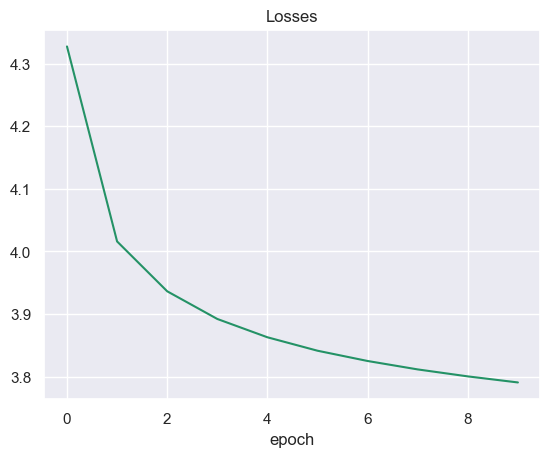

In [77]:
plt.plot(np.arange(len(losses)), losses)
plt.title('Losses')
plt.xlabel("epoch")
plt.show()

In [78]:
def generate_text(
    model: nn.Module,
    starting_seq: str,
    word2ind: dict,
    ind2word: dict,
    max_length: int = 50,
    temperature: float = 1.0,
    top_k: int = 5,
    device: str = 'cpu'
) -> str:
    model = model.to(device)
    model.eval()
    
    # Разбиваем начальную последовательность на слова
    words = word_tokenize(starting_seq)
    print("Начальные слова:", words)  # Отладочная информация
    
    input_ids = [word2ind['<bos>']] + [word2ind.get(word, word2ind['<unk>']) for word in words]
    print("Индексы слов:", input_ids)  # Отладочная информация
    
    input_ids = torch.LongTensor(input_ids).unsqueeze(0).to(device)
    generated_words = words.copy()
    
    with torch.no_grad():
        for _ in range(max_length):
            logits = model(input_ids)[0, -1, :]
            logits = logits / temperature
            top_k_logits, top_k_indices = torch.topk(logits, min(top_k, len(logits)))
            probs = torch.softmax(top_k_logits, dim=-1)
            next_word_idx = top_k_indices[torch.multinomial(probs, 1)].item()
            
            if next_word_idx == word2ind['<eos>']:
                break
                
            next_word = ind2word[next_word_idx]
            print(f"Сгенерировано слово: {next_word} (индекс: {next_word_idx})")  # Отладочная информация
            
            # Пропускаем неизвестные слова
            if next_word == '<unk>':
                continue
                
            generated_words.append(next_word)
            
            input_ids = torch.cat([
                input_ids,
                torch.LongTensor([[next_word_idx]]).to(device)
            ], dim=1)
    
    return ' '.join(generated_words)

In [79]:
# Пример использования:
test_sequences = [
    'you know',
    'i think',
    'the best',
    'in my opinion'
]

for seq in test_sequences:
    generated = generate_text(
        model=model,
        starting_seq=seq,
        word2ind=word2ind,
        ind2word=ind2word,
        temperature=0.9,
        top_k=5
    )
    print(f"\nНачальная последовательность: '{seq}'")
    print(f"Сгенерированный текст: '{generated}'")

Начальные слова: ['you', 'know']
Индексы слов: [2410, 2481, 3004]
Сгенерировано слово: what (индекс: 1800)
Сгенерировано слово: is (индекс: 862)
Сгенерировано слово: the (индекс: 2621)
Сгенерировано слово: <unk> (индекс: 4498)
Сгенерировано слово: most (индекс: 2893)
Сгенерировано слово: important (индекс: 547)
Сгенерировано слово: thing (индекс: 3294)
Сгенерировано слово: in (индекс: 2937)
Сгенерировано слово: the (индекс: 2621)
Сгенерировано слово: world (индекс: 2537)
Сгенерировано слово: ? (индекс: 1614)

Начальная последовательность: 'you know'
Сгенерированный текст: 'you know what is the most important thing in the world ?'
Начальные слова: ['i', 'think']
Индексы слов: [2410, 2456, 1526]
Сгенерировано слово: the (индекс: 2621)
Сгенерировано слово: <unk> (индекс: 4498)
Сгенерировано слово: <unk> (индекс: 4498)
Сгенерировано слово: best (индекс: 970)
Сгенерировано слово: way (индекс: 2451)
Сгенерировано слово: to (индекс: 443)
Сгенерировано слово: do (индекс: 2399)
Сгенерировано сл